In [82]:
import csv
import matplotlib.pyplot as plt

In [83]:
FILE_NAME = "realdata_90d_20000.0b_ODMACPP_V2_90sw"

data_labels = []
data = {}

folder_prefix = "../output/"
file_path = folder_prefix + FILE_NAME + '.csv'
with open(file_path) as csv_file:
    rows = csv.reader(csv_file, delimiter=';')
    title = True
    for row in rows:

        # initialize data list
        if title:
            c = 0
            for col_label in row:
                data_labels.append(col_label)
                data[c] = []
                c += 1
            title = False
            continue
        
        # add new data
        c = 0
        for col_value in row:
            data[c].append(float(col_value))
            c += 1

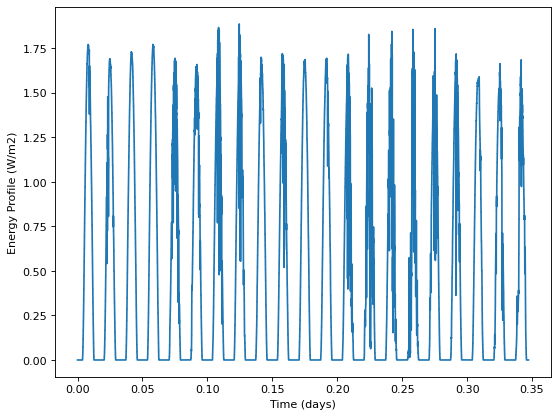

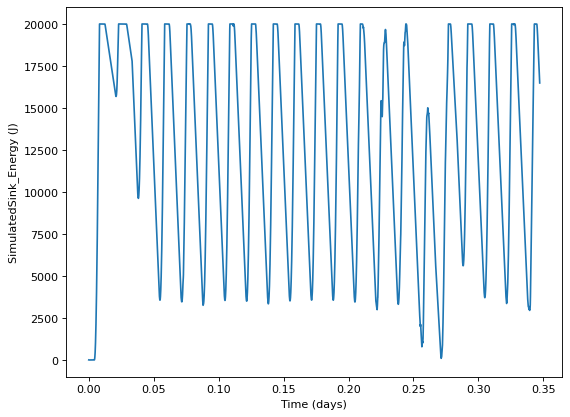

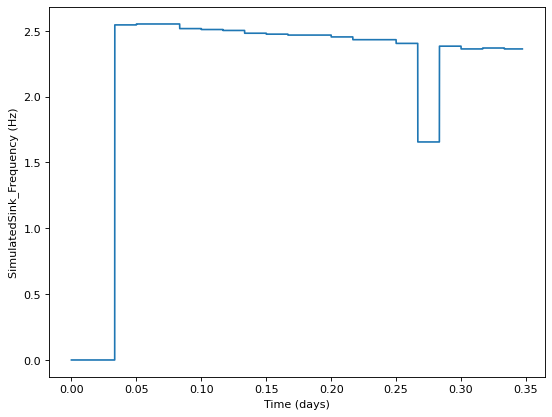

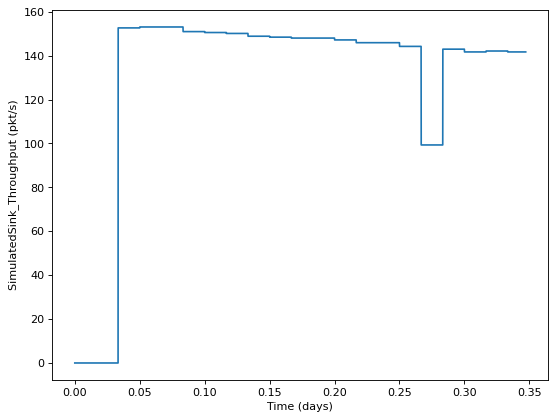

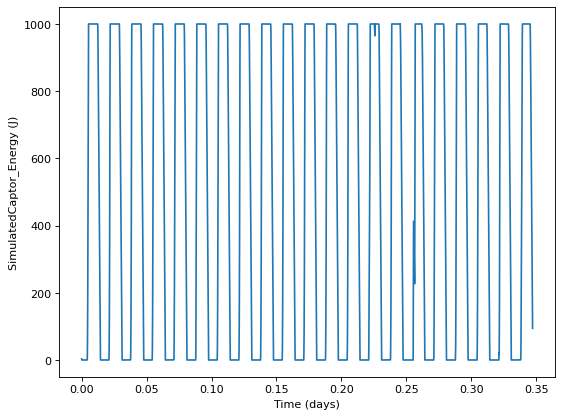

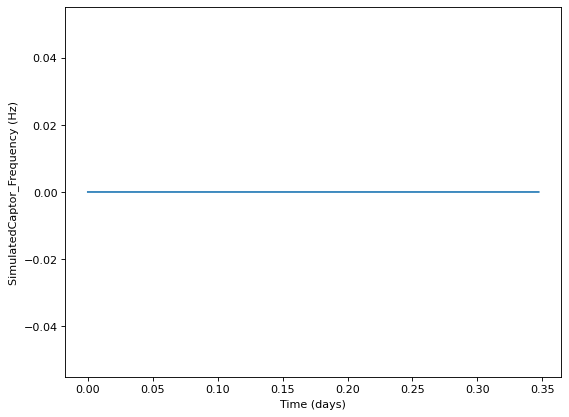

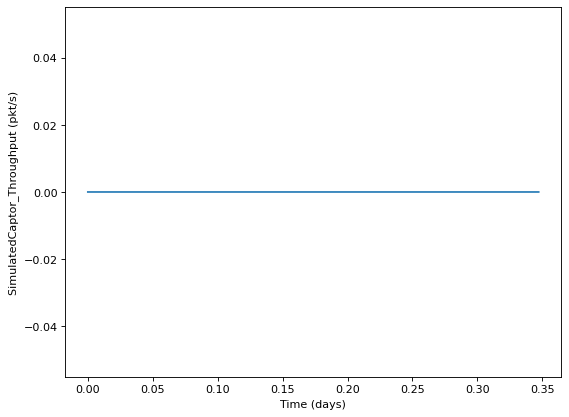

In [87]:
N_ROWS = 6
N_COLS = 1
SHOWN  = 8000 #amount of points to plot
SIZE   = 1

#fig, ax = plt.subplots(N_ROWS, N_COLS)

T = data[0][:SHOWN]
for index in range(1, len(data)):
    Y = data[index][:SHOWN]
    label = data_labels[index]
    #i = (index - 1) % N_ROWS
    #j = (ax_counter - 1) % N_COLS
    plt.figure(figsize=(8, 6), dpi=80 * SIZE)
    plt.plot(T, Y, label=label)
    plt.xlabel('Time (days)')
    plt.ylabel(label)
    plt.show()